In [2]:
!pip install tensorflow matplotlib



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [5]:
import os  # <--- import added

base_dir = 'cat_dog_data'  # <-- adjust to your folder path

train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')


In [6]:
# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for test
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # prevents overfitting
    Dense(1, activation='sigmoid')  # binary output
])


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.5406 - loss: 0.7259 - val_accuracy: 0.6288 - val_loss: 0.6572
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.6450 - loss: 0.6346 - val_accuracy: 0.6817 - val_loss: 0.5918
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 241s 959ms/step - accuracy: 0.7149 - loss: 0.5667 - val_accuracy: 0.7514 - val_loss: 0.5119
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 242s 964ms/step - accuracy: 0.7472 - loss: 0.5159 - val_accuracy: 0.7682 - val_loss: 0.4933
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 244s 971ms/step - accuracy: 0.7612 - loss: 0.4911 - val_accuracy: 0.7820 - val_loss: 0.4524


In [10]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.7699 - loss: 0.4609
Test Accuracy: 78.20%


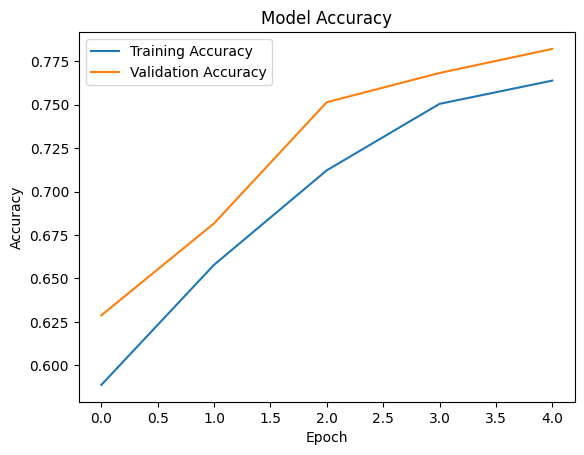

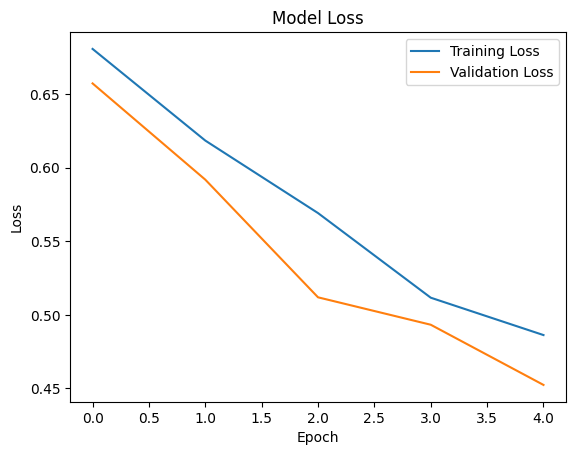

In [11]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
model.save('cat_dog_cnn_model.h5')
print("Model saved as 'cat_dog_cnn_model.h5'")


Model saved as 'cat_dog_cnn_model.h5'


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns


In [14]:
# Reset the generator for safety
test_generator.reset()

# Get predictions
predictions = model.predict(test_generator, verbose=1)

# Convert probabilities to binary labels (0: cat, 1: dog)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())


64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step


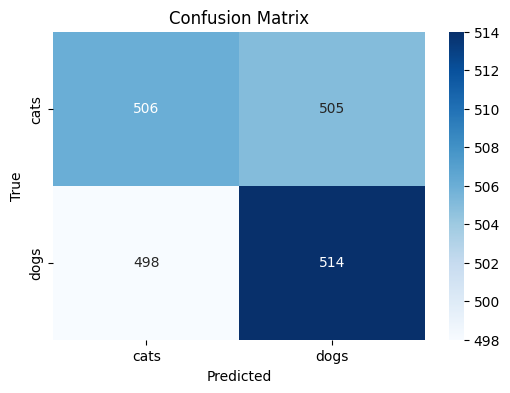

In [15]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [16]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

        cats       0.50      0.50      0.50      1011
        dogs       0.50      0.51      0.51      1012

    accuracy                           0.50      2023
   macro avg       0.50      0.50      0.50      2023
weighted avg       0.50      0.50      0.50      2023



In [17]:
from tensorflow.keras.preprocessing import image


In [18]:
img_path = 'cat_dog_data/test_set/cats/cat.4057.jpg'  

# Load image with target size as per training
img = image.load_img(img_path, target_size=(150, 150))

# Convert to array
img_array = image.img_to_array(img)

# Reshape for batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Rescale
img_array /= 255.0


In [19]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Predicted: Cat


In [20]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted: Cat


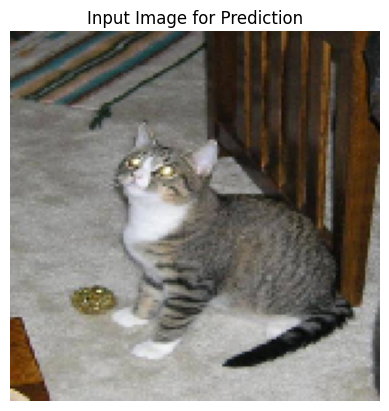

In [21]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.title("Input Image for Prediction")
plt.show()
